In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 6.2 MB/s 


In [ ]:
pip install mne-features

     |████████████████████████████████| 40 kB 4.5 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=74461fdb1923b1ddc8b9564d0298f77a37709a91f07a2a47a61892a59b5b4448
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [ ]:
pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas

In [ ]:
pip install git+https://github.com/mne-tools/mne-features.git#egg=mne_features

  Cloning https://github.com/mne-tools/mne-features.git to /tmp/pip-install-2msbkicl/mne-features_306107d593764ee8b518ecb0091fa8f2
  Running command git clone -q https://github.com/mne-tools/mne-features.git /tmp/pip-install-2msbkicl/mne-features_306107d593764ee8b518ecb0091fa8f2


In [ ]:
pip install antropy

     |████████████████████████████████| 49 kB 3.7 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=8046790d94fd250f8418f19c6f44edeb45a675ae27e8f0eee9eaa153afb2511e
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [ ]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import train_test_split
import fastdtw
#dtw for comparing two sequences and calculating the optimal matchinh between two sequences
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import butter, lfilter, freqz, boxcar
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, euclidean_distances
from scipy.fftpack import fft, ifft
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
train_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_events.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series10_data.csv")
test_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series9_data.csv")

In [ ]:
train_complete = pd.concat([train_data,train_data_event], axis=1)
train_complete.insert(0, "order", range(0, len(train_complete)))
train_complete

,order,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,C3,Cz,C4,T8,TP9,CP5,CP1,CP2,CP6,TP10,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,158,543,-166,192,230,573,860,128,59,272,473,325,379,536,348,383,105,607,289,459,173,120,704,subj1_series1_0,0,0,0,0,0,0
1,1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,166,495,-138,201,233,554,846,185,47,269,455,307,368,529,327,369,78,613,248,409,141,83,737,subj1_series1_1,0,0,0,0,0,0
2,2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,177,534,-163,198,207,542,768,145,52,250,452,273,273,511,319,355,66,606,320,440,141,62,677,subj1_series1_2,0,0,0,0,0,0
3,3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,180,525,-310,212,221,542,808,115,41,276,432,258,241,521,336,356,71,568,339,437,139,58,592,subj1_series1_3,0,0,0,0,0,0
4,4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,165,507,-320,242,230,545,865,180,89,288,444,275,275,550,324,346,76,547,343,446,171,67,581,subj1_series1_4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,subj1_series1_119491,478,520,377,172,141,118,-123,626,70,40,9,-95,73,-89,233,292,-85,-38,74,-34,2,-305,383,85,-1,444,337,-255,160,-121,-285,-178,subj1_series1_119491,0,0,0,0,0,0
119492,119492,subj1_series1_119492,439,450,298,185,128,502,-331,593,30,54,256,-224,49,-99,264,304,-210,-59,63,-19,10,-283,334,61,-8,427,322,-310,107,-152,-295,-178,subj1_series1_119492,0,0,0,0,0,0
119493,119493,subj1_series1_119493,363,370,278,239,124,768,-410,527,16,72,253,-394,35,-134,241,104,-164,-52,45,-45,16,-185,303,53,-24,438,368,-134,187,-99,-269,-121,subj1_series1_119493,0,0,0,0,0,0
119494,119494,subj1_series1_119494,281,298,318,257,130,736,-556,542,29,67,184,-260,42,-112,232,-168,-119,-30,54,-51,26,-177,341,50,-25,444,348,-135,181,-122,-290,-77,subj1_series1_119494,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(train_complete)

In [ ]:
new_data = df.drop(['id','Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7','T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P8', 'PO9','O1','Oz','O2','O2','PO10'], axis = 1)
new_data

,order,C3,Cz,C4,P3,Pz,P4,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,192,230,573,348,383,105,0,0,0,0,0,0
1,1,201,233,554,327,369,78,0,0,0,0,0,0
2,2,198,207,542,319,355,66,0,0,0,0,0,0
3,3,212,221,542,336,356,71,0,0,0,0,0,0
4,4,242,230,545,324,346,76,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,73,-89,233,85,-1,444,0,0,0,0,0,0
119492,119492,49,-99,264,61,-8,427,0,0,0,0,0,0
119493,119493,35,-134,241,53,-24,438,0,0,0,0,0,0
119494,119494,42,-112,232,50,-25,444,0,0,0,0,0,0


In [ ]:
C3= train_data.loc[:,"C3"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4

0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
Cz= train_data.loc[:,"Cz"]
Cz

0         230
1         233
2         207
3         221
4         230
         ... 
119491    -89
119492    -99
119493   -134
119494   -112
119495   -113
Name: Cz, Length: 119496, dtype: int64

In [ ]:
P3= train_data.loc[:,"P3"]
P3

0         348
1         327
2         319
3         336
4         324
         ... 
119491     85
119492     61
119493     53
119494     50
119495     75
Name: P3, Length: 119496, dtype: int64

In [ ]:
P4= train_data.loc[:,"P4"]
P4

0         105
1          78
2          66
3          71
4          76
         ... 
119491    444
119492    427
119493    438
119494    444
119495    460
Name: P4, Length: 119496, dtype: int64

In [ ]:
Pz= train_data.loc[:,"Pz"]
Pz

0         383
1         369
2         355
3         356
4         346
         ... 
119491     -1
119492     -8
119493    -24
119494    -25
119495     -3
Name: Pz, Length: 119496, dtype: int64

In [ ]:
BSL = new_data.loc[:,"BothStartLoadPhase"]
BSL

0         0
1         0
2         0
3         0
4         0
         ..
119491    0
119492    0
119493    0
119494    0
119495    0
Name: BothStartLoadPhase, Length: 119496, dtype: int64

[424, 416, 417, 417, 369, 369, 419, 406, 376, 353, 353, 387, 388, 399, 410, 382, 374, 401, 435, 427, 449, 436, 442, 451, 461, 421, 403, 438, 410, 437, 466, 484, 396, 391, 447, 415, 423, 428, 452, 460, 449, 417, 397, 402, 424, 394, 376, 389, 362, 347, 326, 345, 376, 390, 395, 390, 369, 403, 406, 397, 418, 405, 407, 435, 432, 401, 392, 404, 377, 416, 442, 419, 409, 409, 407, 416, 416, 422, 412, 360, 378, 441, 473, 423, 380, 386, 366, 362, 371, 408, 424, 379, 416, 412, 408, 420, 444, 424, 389, 385, 397, 393, 380, 423, 420, 464, 501, 456, 454, 438, 448, 428, 413, 458, 448, 473, 456, 428, 431, 411, 423, 421, 399, 409, 416, 393, 391, 364, 355, 343, 358, 317, 313, 292, 312, 278, 258, 292, 314, 331, 304, 298, 295, 256, 244, 285, 293, 283, 321, 312, 452, 453, 459, 456, 477, 501, 477, 461, 487, 509, 500, 470, 453, 431, 433, 494, 521, 452, 432, 436, 477, 464, 465, 484, 482, 483, 455, 470, 478, 470, 486, 472, 460, 456, 424, 425, 426, 441, 430, 399, 414, 413, 416, 431, 437, 443, 450, 502, 525, 473,

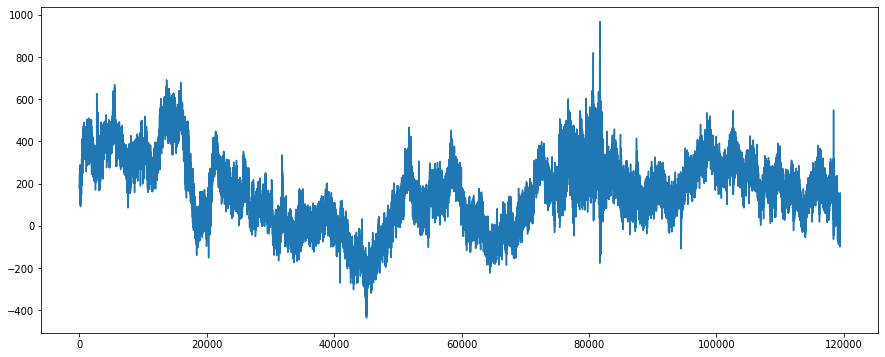

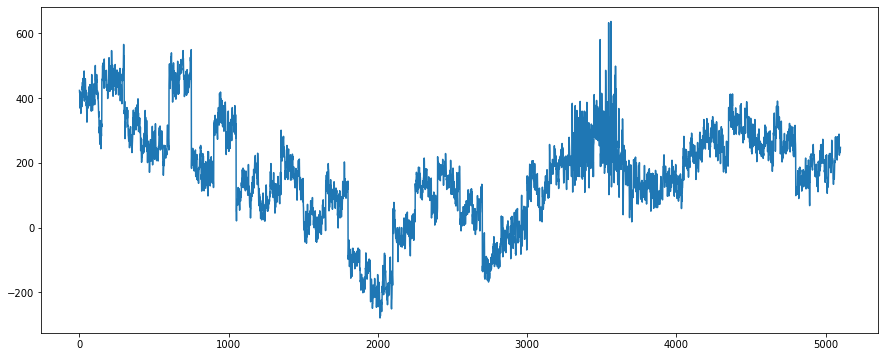

In [ ]:
C3_bsl = []
for i in range(119495):
  if BSL[i] == 1:
    C3_bsl.append(C3[i])
 
print(C3_bsl)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3_bsl)

<Figure size 1440x432 with 0 Axes>

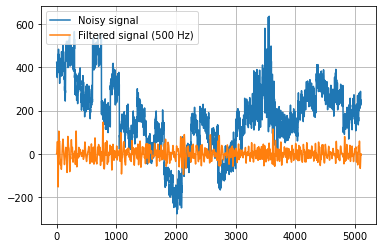

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C3_bsl, label='Noisy signal')

y = butter_bandpass_filter(C3_bsl, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y))

5100


In [ ]:
from scipy.stats import norm, kurtosis
from scipy.stats import skew
import statistics
import mne
import mne_features

In [ ]:
y = np.array(y)
import statistics

median = np.median(y)
mean = y.mean()
var = statistics.variance(y)
std_dev = var ** 0.5
kurtosis = kurtosis(y)
skewness = skew(y)
peak2peak = max(y)-min(y)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  844.6744245008846
median =  -1.2126728255431183
mean =  -0.028770706040784435
Standard Deviation =  29.0632830991422
kurtosis =  1.4764351049682576
skewness =  0.16460110001853398
Peak to peak =  299.9032462767286


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y)

-0.028770706040784435

In [ ]:
#2.median
median = np.median(y)
median

-1.2126728255431183

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y)

844.6744245008846

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y)

29.0632830991422

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y)

4.476435104968258

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y)

0.16460110001853398

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y)

299.9032462767286

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y)

29.060447859904603

In [ ]:
#Freqeuncy Domain
#9.power spectrum density
mne_features.utils.power_spectrum(500,y)

(array([2.28529096e-01, 1.79535422e-01, 1.27490597e+00, 3.17523781e+01,
        6.73646025e+01, 6.24397374e+01, 3.27425767e+01, 3.53679297e+01,
        2.68883147e+01, 2.57394664e+01, 2.69342329e+01, 2.12204700e+01,
        1.89247135e+01, 1.84359947e+01, 1.38648520e+01, 8.88639201e+00,
        5.24072404e+00, 2.74609657e+00, 9.23827202e-01, 3.32905422e-01,
        1.23967860e-01, 4.64566519e-02, 1.81128472e-02, 1.09416079e-02,
        4.22545149e-03, 3.45050515e-03, 1.97942915e-03, 1.98004154e-03,
        1.08540820e-03, 6.72170123e-04, 7.93048708e-04, 4.37601456e-04,
        5.40942402e-04, 4.01206586e-04, 3.39423846e-04, 3.49615878e-04,
        3.35512898e-04, 2.74283457e-04, 2.70439706e-04, 2.46671410e-04,
        2.37247206e-04, 2.33108060e-04, 2.15357074e-04, 2.04790699e-04,
        1.94445211e-04, 1.86219154e-04, 1.79369656e-04, 1.69220346e-04,
        1.64109787e-04, 1.56327254e-04, 1.51526005e-04, 1.44058581e-04,
        1.39003052e-04, 1.34874811e-04, 1.30100376e-04, 1.256610

In [ ]:
import numpy as np
import antropy as ant

#10. Spectral entropy
print(ant.spectral_entropy(y, sf=500, method='welch', normalize=True))

0.521464003692706


In [ ]:
#11. Approximate entropy
print(ant.app_entropy(y))

0.609370579702663


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))
zs = numpy.where(numpy.diff(numpy.sign(y)))[0]
zs


317


array([  16,   30,   55,   87,  119,  145,  165,  180,  209,  238,  267,
        296,  305,  318,  332,  365,  376,  384,  409,  429,  440,  462,
        484,  517,  548,  565,  569,  573,  587,  609,  619,  631,  650,
        680,  710,  716,  726,  750,  757,  766,  781,  808,  826,  831,
        844,  873,  879,  885,  901,  905,  917,  932,  952,  967,  979,
        999, 1010, 1020, 1029, 1045, 1057, 1066, 1079, 1106, 1134, 1160,
       1171, 1178, 1211, 1222, 1224, 1253, 1269, 1273, 1288, 1308, 1336,
       1355, 1366, 1379, 1404, 1429, 1444, 1448, 1465, 1493, 1508, 1518,
       1531, 1553, 1593, 1632, 1649, 1656, 1667, 1684, 1702, 1710, 1717,
       1730, 1738, 1744, 1756, 1766, 1774, 1797, 1810, 1817, 1829, 1856,
       1884, 1900, 1905, 1923, 1958, 1967, 1974, 2001, 2041, 2068, 2087,
       2107, 2117, 2130, 2153, 2182, 2209, 2220, 2221, 2231, 2237, 2255,
       2270, 2279, 2293, 2333, 2362, 2382, 2388, 2399, 2418, 2430, 2451,
       2478, 2499, 2507, 2518, 2529, 2541, 2567, 25

## **C4 Channel**

[724, 722, 720, 709, 720, 705, 691, 697, 667, 664, 637, 629, 655, 669, 657, 641, 655, 656, 617, 588, 625, 622, 648, 655, 636, 635, 656, 633, 639, 682, 625, 586, 633, 638, 635, 646, 669, 655, 656, 693, 716, 707, 669, 705, 716, 663, 646, 670, 689, 662, 669, 698, 641, 653, 663, 628, 679, 658, 620, 664, 684, 668, 665, 669, 676, 676, 654, 675, 607, 615, 648, 618, 653, 636, 629, 621, 609, 641, 619, 630, 653, 625, 583, 626, 565, 583, 610, 590, 595, 614, 620, 601, 618, 622, 585, 599, 613, 639, 646, 630, 661, 646, 642, 705, 700, 677, 670, 699, 690, 692, 682, 672, 681, 688, 681, 674, 633, 627, 651, 590, 597, 594, 558, 565, 606, 608, 597, 567, 546, 532, 571, 591, 562, 514, 480, 482, 522, 545, 525, 513, 510, 521, 499, 478, 510, 502, 484, 490, 544, 557, 523, 514, 541, 509, 536, 547, 542, 505, 518, 539, 550, 546, 554, 565, 559, 532, 512, 504, 502, 505, 502, 491, 532, 528, 503, 508, 511, 513, 469, 504, 532, 570, 576, 579, 524, 505, 500, 494, 480, 506, 506, 495, 478, 494, 525, 509, 458, 493, 488, 474,

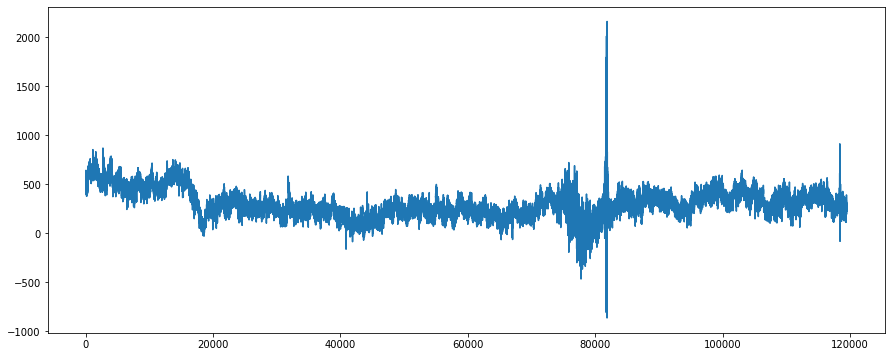

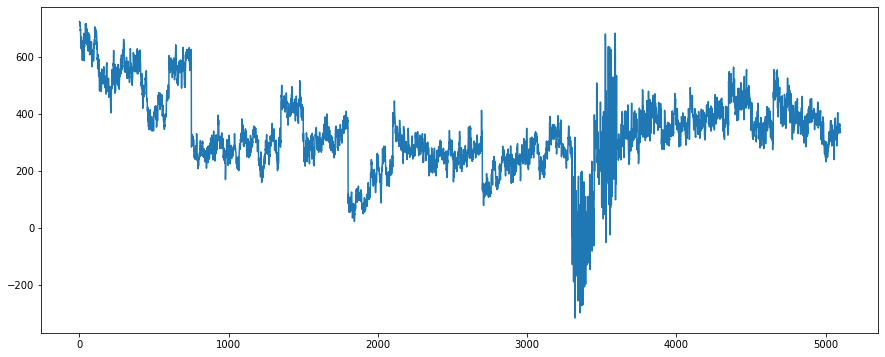

In [ ]:
C4_bsl = []
for i in range(119495):
  if BSL[i] == 1:
    C4_bsl.append(C4[i])
 
print(C4_bsl)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4_bsl)

<Figure size 1440x432 with 0 Axes>

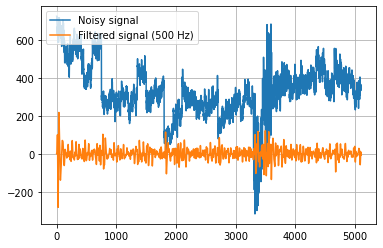

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C4_bsl, label='Noisy signal')

y2 = butter_bandpass_filter(C4_bsl, lowcut, highcut, fs, order=6)

plt.plot( y2, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y2))

5100


In [ ]:
y2 = np.array(y2)
import statistics

median = np.median(y2)
mean = y2.mean()
var = statistics.variance(y2)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y2)
peak2peak = max(y2)-min(y2)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1095.8467441511666
median =  -0.4874054121916856
mean =  -0.0277150231872018
Standard Deviation =  33.10357600246787
kurtosis =  1.4764351049682576
skewness =  -0.29656404454046087
Peak to peak =  499.67094066987266


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y2)

-0.0277150231872018

In [ ]:
#2.median
median = np.median(y2)
median

-0.4874054121916856

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y2)

1095.8467441511664

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y2)

33.10357600246787

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y2)

10.778883484675843

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y2)

-0.29656404454046087

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y2)

499.67094066987266

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y2)

33.10034199767517

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y2)

(array([6.04914034e-01, 4.49849317e-01, 1.36592229e+00, 3.02206869e+01,
        1.00606106e+02, 6.66428037e+01, 3.26846158e+01, 3.75707066e+01,
        3.11080093e+01, 2.62492080e+01, 1.44657273e+01, 1.76258945e+01,
        9.64744795e+00, 1.24077705e+01, 1.49681940e+01, 9.73192391e+00,
        4.53416741e+00, 2.07470192e+00, 8.68158833e-01, 1.57383938e-01,
        1.05846917e-01, 3.54060229e-02, 1.70956960e-02, 1.08617446e-02,
        8.70253398e-03, 3.35274563e-03, 1.89328851e-03, 1.90402295e-03,
        1.34831667e-03, 1.26196964e-03, 1.04536559e-03, 1.02096984e-03,
        7.49959919e-04, 8.46698911e-04, 7.27899305e-04, 6.12951206e-04,
        6.00314388e-04, 5.50482335e-04, 4.96135089e-04, 5.26715091e-04,
        4.71206835e-04, 4.31669175e-04, 4.15350569e-04, 3.90032831e-04,
        3.83100812e-04, 3.60042087e-04, 3.40072032e-04, 3.27560981e-04,
        3.16921790e-04, 3.00260983e-04, 2.89304506e-04, 2.76357424e-04,
        2.68080249e-04, 2.57577747e-04, 2.48049281e-04, 2.396617

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y2, sf=500, method='welch', normalize=True))

0.504098491571383


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y2))

0.5674080712541811


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y2))

zs = numpy.where(numpy.diff(numpy.sign(y2)))[0]
zs

309


array([  16,   30,   54,   84,  115,  136,  159,  179,  199,  208,  212,
        226,  233,  249,  270,  303,  309,  316,  333,  366,  379,  387,
        402,  430,  447,  468,  486,  511,  520,  526,  543,  557,  560,
        573,  592,  609,  647,  671,  685,  693,  709,  719,  729,  744,
        761,  765,  780,  807,  836,  878,  898,  902,  915,  954,  970,
        994,  998, 1012, 1022, 1024, 1040, 1065, 1086, 1108, 1128, 1169,
       1186, 1190, 1205, 1222, 1227, 1240, 1250, 1258, 1293, 1316, 1350,
       1378, 1401, 1432, 1437, 1444, 1468, 1501, 1530, 1553, 1595, 1611,
       1627, 1632, 1645, 1667, 1692, 1702, 1703, 1721, 1732, 1743, 1761,
       1777, 1781, 1795, 1806, 1816, 1830, 1853, 1889, 1915, 1922, 1932,
       1952, 1955, 1968, 1982, 1993, 1998, 2008, 2022, 2044, 2063, 2084,
       2108, 2117, 2129, 2149, 2175, 2216, 2231, 2239, 2252, 2268, 2279,
       2297, 2319, 2329, 2338, 2348, 2356, 2367, 2387, 2390, 2401, 2414,
       2430, 2434, 2443, 2456, 2477, 2487, 2501, 25

## **Cz Channel**

[162, 163, 141, 135, 139, 125, 111, 101, 106, 89, 88, 102, 120, 128, 126, 117, 126, 119, 133, 117, 108, 104, 116, 121, 134, 109, 102, 106, 120, 122, 116, 134, 128, 109, 118, 113, 111, 102, 126, 148, 138, 101, 83, 97, 124, 123, 108, 112, 92, 82, 82, 109, 102, 110, 89, 82, 84, 71, 83, 100, 109, 78, 94, 102, 97, 74, 88, 120, 101, 110, 113, 98, 112, 95, 83, 77, 107, 112, 96, 69, 92, 95, 87, 116, 106, 74, 73, 72, 77, 91, 104, 120, 123, 116, 114, 143, 160, 146, 146, 136, 142, 147, 127, 156, 144, 129, 137, 150, 151, 127, 116, 106, 123, 113, 104, 123, 100, 85, 89, 61, 52, 76, 36, 31, 60, 77, 84, 74, 68, 62, 63, 75, 76, 37, 41, 53, 88, 105, 74, 76, 58, 55, 56, 36, 23, 27, 43, 26, 48, 61, 71, 76, 86, 57, 61, 74, 83, 71, 79, 95, 92, 89, 84, 94, 104, 105, 88, 85, 71, 64, 71, 86, 109, 105, 98, 115, 103, 98, 79, 88, 93, 82, 93, 87, 65, 79, 46, 43, 71, 68, 75, 71, 89, 97, 104, 91, 72, 76, 94, 82, 91, 80, 65, 62, 78, 72, 88, 73, 71, 59, 44, 13, 25, 38, 55, 81, 69, 82, 98, 80, 87, 80, 70, 69, 43, 57, 7

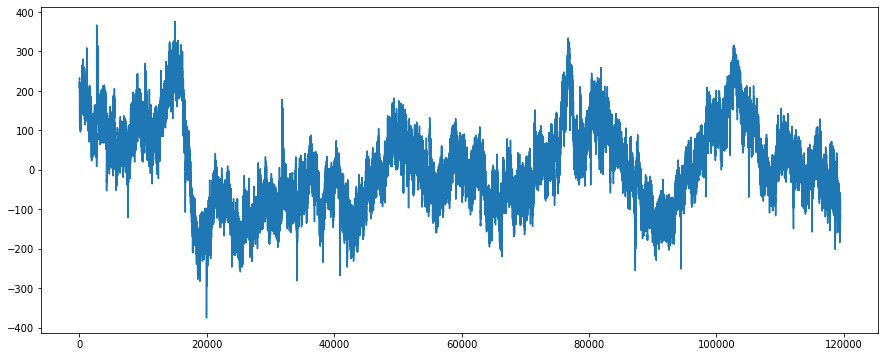

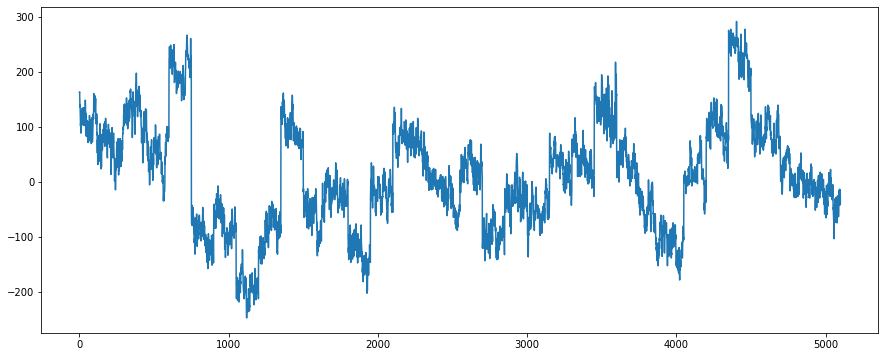

In [ ]:
Cz_bsl = []
for i in range(119495):
  if BSL[i] == 1:
    Cz_bsl.append(Cz[i])
 
print(Cz_bsl)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz_bsl)

<Figure size 1440x432 with 0 Axes>

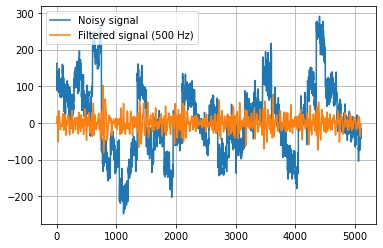

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Cz_bsl, label='Noisy signal')

y3 = butter_bandpass_filter(Cz_bsl, lowcut, highcut, fs, order=6)

plt.plot( y3, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y3))

5100


In [ ]:
y3 = np.array(y3)
import statistics

median = np.median(y3)
mean = y3.mean()
var = statistics.variance(y3)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y3)
peak2peak = max(y3)-min(y3)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  430.0478672178228
median =  0.009042837556541028
mean =  -0.03546402509348271
Standard Deviation =  20.737595502319518
kurtosis =  1.4764351049682576
skewness =  0.03791391321009321
Peak to peak =  183.05479953814051


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y3)

-0.03546402509348271

In [ ]:
#2.median
median = np.median(y3)
median

0.009042837556541028

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y3)

430.0478672178228

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y3)

20.737595502319518

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y3)

3.9455253484941624

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y3)

0.03791391321009321

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y3)

183.05479953814051

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y3)

20.73559263208263

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y3)

(array([2.18623930e-01, 1.66485148e-01, 6.38458093e-01, 1.57918005e+01,
        4.93103079e+01, 3.45004436e+01, 2.21530100e+01, 2.20285553e+01,
        1.93767091e+01, 1.31046338e+01, 9.92010829e+00, 9.96237298e+00,
        9.37242897e+00, 8.38422597e+00, 6.36891028e+00, 5.41205077e+00,
        2.50521908e+00, 9.37588127e-01, 2.14508376e-01, 5.43227063e-02,
        3.36032147e-02, 1.77311276e-02, 7.46709574e-03, 5.13267778e-03,
        1.76051961e-03, 1.72441978e-03, 1.51162265e-03, 7.54858291e-04,
        8.09909658e-04, 5.91332523e-04, 4.62175967e-04, 4.93395149e-04,
        3.99597214e-04, 3.63417063e-04, 3.41004528e-04, 3.18798468e-04,
        3.01007718e-04, 2.60361642e-04, 2.62762684e-04, 2.42622288e-04,
        2.24365381e-04, 2.16838204e-04, 2.04354552e-04, 1.92381054e-04,
        1.83289292e-04, 1.75921659e-04, 1.66520469e-04, 1.59007194e-04,
        1.53795027e-04, 1.45932419e-04, 1.40020781e-04, 1.35084215e-04,
        1.29717323e-04, 1.25286223e-04, 1.20571166e-04, 1.161819

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y3, sf=500, method='welch', normalize=True))

0.5139894717806525


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y3))

0.6035499157260271


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))

zs = numpy.where(numpy.diff(numpy.sign(y3)))[0]
zs

317


array([  16,   29,   53,   91,  111,  126,  145,  162,  171,  179,  209,
        227,  233,  245,  265,  280,  288,  295,  306,  321,  348,  367,
        379,  386,  395,  404,  415,  425,  443,  466,  490,  508,  517,
        526,  547,  575,  589,  605,  620,  631,  645,  672,  677,  685,
        710,  720,  727,  743,  759,  767,  779,  805,  837,  868,  915,
        931,  935,  942,  967,  974,  976,  991, 1001, 1012, 1023, 1032,
       1056, 1067, 1080, 1107, 1128, 1170, 1193, 1231, 1261, 1278, 1288,
       1297, 1308, 1316, 1329, 1339, 1348, 1359, 1367, 1380, 1405, 1433,
       1466, 1500, 1513, 1515, 1531, 1555, 1582, 1588, 1595, 1608, 1620,
       1650, 1667, 1691, 1696, 1704, 1712, 1725, 1738, 1739, 1758, 1778,
       1795, 1798, 1810, 1818, 1830, 1855, 1888, 1914, 1927, 1928, 1953,
       1962, 1966, 1979, 2007, 2030, 2052, 2069, 2086, 2105, 2119, 2131,
       2152, 2177, 2204, 2212, 2219, 2242, 2271, 2291, 2303, 2313, 2324,
       2336, 2346, 2356, 2367, 2399, 2423, 2444, 24

## **P3 Channel**

[415, 481, 502, 453, 463, 474, 470, 393, 387, 389, 389, 422, 441, 470, 491, 443, 431, 452, 477, 499, 525, 500, 517, 518, 534, 488, 465, 498, 475, 471, 477, 501, 485, 462, 481, 485, 473, 467, 498, 524, 546, 505, 468, 475, 488, 473, 466, 466, 442, 408, 407, 427, 416, 459, 451, 436, 421, 422, 442, 453, 498, 494, 505, 520, 480, 481, 478, 522, 506, 526, 549, 533, 544, 557, 519, 489, 493, 468, 441, 429, 453, 457, 490, 522, 474, 469, 460, 442, 433, 482, 501, 488, 510, 505, 493, 544, 554, 559, 545, 551, 538, 532, 556, 612, 590, 615, 630, 603, 591, 566, 575, 596, 609, 609, 595, 608, 579, 569, 563, 507, 479, 489, 447, 453, 470, 459, 439, 380, 357, 332, 309, 285, 273, 243, 262, 257, 270, 300, 301, 318, 316, 289, 274, 261, 263, 270, 254, 283, 306, 329, 412, 401, 416, 410, 429, 437, 449, 429, 449, 465, 445, 425, 401, 396, 400, 457, 471, 441, 392, 368, 400, 416, 417, 456, 472, 448, 406, 389, 417, 440, 428, 434, 457, 434, 398, 380, 339, 341, 346, 349, 368, 365, 358, 391, 417, 420, 427, 439, 472, 460,

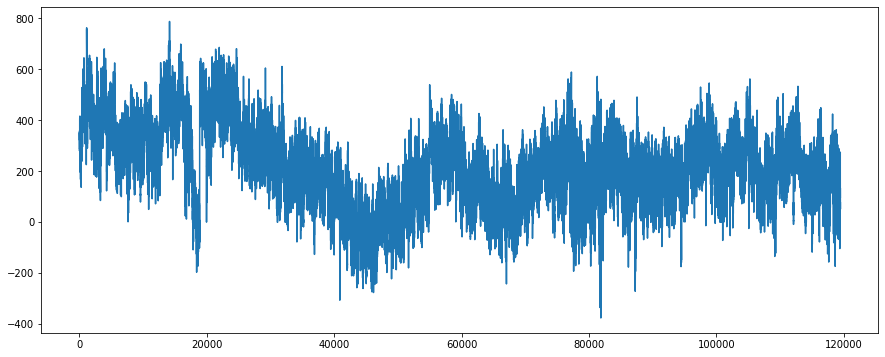

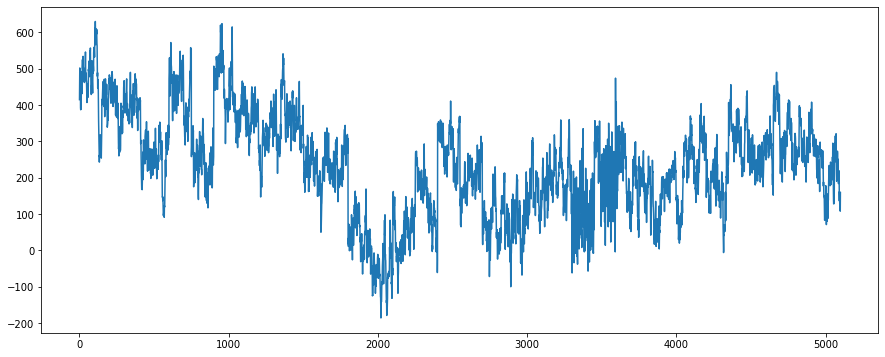

In [ ]:
P3_bsl = []
for i in range(119495):
  if BSL[i] == 1:
    P3_bsl.append(P3[i])
 
print(P3_bsl)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3_bsl)

<Figure size 1440x432 with 0 Axes>

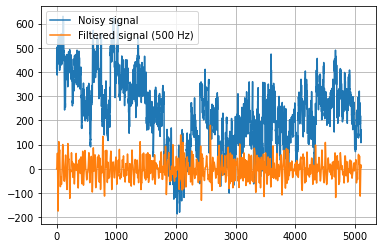

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P3_bsl, label='Noisy signal')

y4 = butter_bandpass_filter(P3_bsl, lowcut, highcut, fs, order=6)

plt.plot( y4, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y4))

5100


In [ ]:
y4 = np.array(y4)
import statistics

median = np.median(y4)
mean = y4.mean()
var = statistics.variance(y4)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y4)
peak2peak = max(y4)-min(y4)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1737.0309297859558
median =  0.15313098141667997
mean =  -0.05015991309393762
Standard Deviation =  41.67770302914924
kurtosis =  1.4764351049682576
skewness =  0.044511295913041905
Peak to peak =  353.8914082824855


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y4)

-0.05015991309393762

In [ ]:
#2.median
median = np.median(y4)
median

0.15313098141667997

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y4)

1737.0309297859558

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y4)

41.67770302914924

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y4)

3.292936027230012

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y4)

0.044511295913041905

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y4)

353.8914082824855

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y4)

41.67364696667283

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y4)

(array([1.34090922e+00, 8.98480049e-01, 2.66368317e+00, 6.55990331e+01,
        1.43087343e+02, 1.26360926e+02, 8.43429066e+01, 9.21696061e+01,
        6.78264387e+01, 6.21084274e+01, 4.33102322e+01, 3.50485994e+01,
        3.13447557e+01, 2.54038604e+01, 2.42070663e+01, 1.86789859e+01,
        9.23960673e+00, 3.85114218e+00, 1.04511818e+00, 4.01444893e-01,
        1.83095627e-01, 8.44640921e-02, 3.34564935e-02, 2.05794539e-02,
        8.08178857e-03, 7.21050850e-03, 3.25134787e-03, 2.85695766e-03,
        2.29242362e-03, 2.07231822e-03, 1.86505418e-03, 1.45693715e-03,
        1.45287717e-03, 1.26811241e-03, 1.16990713e-03, 1.06657781e-03,
        1.06445317e-03, 9.49420041e-04, 9.21786909e-04, 8.45280766e-04,
        8.15868345e-04, 7.67278871e-04, 7.48920622e-04, 6.96671766e-04,
        6.71722650e-04, 6.45362622e-04, 6.09807149e-04, 5.89371385e-04,
        5.67629686e-04, 5.42414979e-04, 5.24447165e-04, 5.02524259e-04,
        4.86383468e-04, 4.68968809e-04, 4.54122547e-04, 4.393109

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y4, sf=500, method='welch', normalize=True))

0.5065893491010551


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y4))

0.6092395888801629


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y4))

zs = numpy.where(numpy.diff(numpy.sign(y4)))[0]
zs

294


array([  16,   29,   55,   91,  114,  138,  156,  179,  210,  239,  268,
        279,  288,  304,  314,  317,  334,  338,  349,  367,  393,  400,
        413,  430,  442,  464,  487,  525,  547,  565,  587,  606,  622,
        629,  648,  673,  708,  719,  727,  745,  757,  765,  782,  810,
        843,  854,  863,  891,  916,  931,  952,  975, 1000, 1027, 1037,
       1043, 1057, 1092, 1125, 1153, 1163, 1176, 1196, 1221, 1241, 1255,
       1282, 1308, 1334, 1341, 1351, 1380, 1405, 1432, 1445, 1449, 1466,
       1496, 1509, 1519, 1533, 1552, 1566, 1583, 1598, 1613, 1624, 1634,
       1645, 1656, 1699, 1726, 1738, 1744, 1758, 1783, 1790, 1797, 1810,
       1816, 1829, 1852, 1886, 1919, 1930, 1940, 1958, 1983, 1987, 1998,
       2027, 2031, 2044, 2069, 2085, 2107, 2119, 2131, 2153, 2176, 2206,
       2218, 2220, 2230, 2235, 2251, 2268, 2280, 2296, 2320, 2323, 2334,
       2363, 2380, 2388, 2401, 2418, 2431, 2454, 2483, 2528, 2566, 2582,
       2608, 2621, 2628, 2655, 2676, 2678, 2689, 27

## *P4 Channel
***

[551, 590, 617, 589, 599, 572, 564, 556, 516, 506, 519, 550, 541, 558, 562, 531, 530, 532, 524, 508, 510, 498, 540, 552, 534, 507, 531, 524, 520, 555, 562, 511, 510, 510, 523, 531, 533, 520, 570, 637, 646, 596, 536, 549, 530, 500, 520, 527, 504, 462, 464, 497, 466, 510, 496, 435, 467, 477, 475, 485, 532, 510, 511, 529, 506, 520, 499, 563, 557, 512, 535, 490, 541, 512, 499, 501, 497, 491, 476, 478, 490, 460, 457, 539, 431, 408, 430, 455, 478, 509, 526, 493, 531, 545, 539, 589, 592, 596, 618, 656, 667, 628, 622, 680, 643, 656, 676, 647, 621, 596, 589, 577, 583, 591, 530, 557, 521, 502, 515, 438, 435, 443, 423, 387, 419, 428, 439, 415, 374, 317, 331, 371, 319, 251, 248, 260, 315, 349, 329, 316, 306, 317, 307, 278, 287, 260, 249, 308, 340, 360, 463, 427, 467, 442, 466, 478, 544, 493, 485, 492, 514, 500, 503, 486, 463, 475, 468, 479, 440, 394, 399, 414, 428, 422, 425, 463, 398, 369, 375, 382, 411, 468, 473, 450, 403, 388, 372, 357, 390, 409, 403, 410, 426, 446, 476, 417, 378, 428, 420, 398,

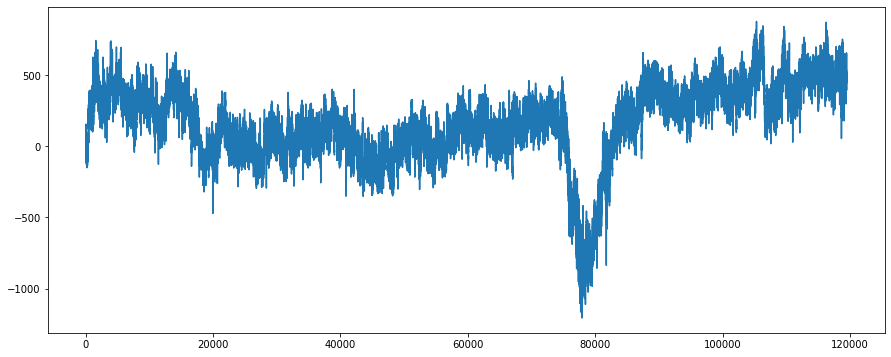

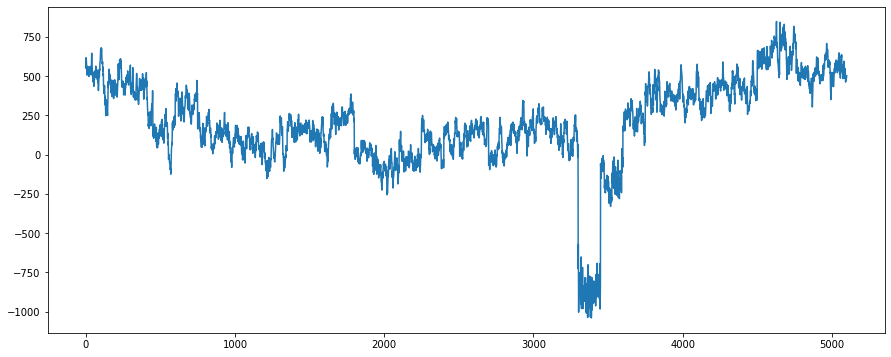

In [ ]:
P4_bsl = []
for i in range(119495):
  if BSL[i] == 1:
    P4_bsl.append(P4[i])
 
print(P4_bsl)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4_bsl)

<Figure size 1440x432 with 0 Axes>

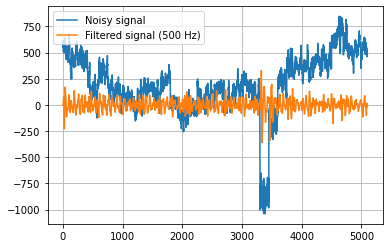

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P4_bsl, label='Noisy signal')

y5 = butter_bandpass_filter(P4_bsl, lowcut, highcut, fs, order=6)

plt.plot( y5, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y5))

5100


In [ ]:
y5 = np.array(y5)
import statistics

median = np.median(y5)
mean = y5.mean()
var = statistics.variance(y5)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y5)
peak2peak = max(y5)-min(y5)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  3344.9978844089496
median =  0.5982910708563047
mean =  -0.06092009659119305
Standard Deviation =  57.83595667410499
kurtosis =  1.4764351049682576
skewness =  -0.3098756346871266
Peak to peak =  688.1110630200039


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y5)

-0.06092009659119305

In [ ]:
#2.median
median = np.median(y5)
median

0.5982910708563047

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y5)

3344.9978844089496

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y5)

57.83595667410499

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y5)

6.699302324797847

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y5)

-0.3098756346871266

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y5)

688.1110630200039

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y5)

57.830318291783584

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y5)

(array([4.96896824e+00, 3.44592307e+00, 4.25822180e+00, 1.22923836e+02,
        3.80667395e+02, 2.56026583e+02, 1.58199520e+02, 1.35669303e+02,
        1.18790970e+02, 8.65994496e+01, 5.70399812e+01, 4.96172497e+01,
        4.37845518e+01, 3.28671831e+01, 3.04792643e+01, 1.93704334e+01,
        8.81881207e+00, 4.87237622e+00, 1.27619374e+00, 4.66277259e-01,
        1.83473073e-01, 1.22281902e-01, 3.66186880e-02, 3.61494370e-02,
        1.44178185e-02, 1.81382472e-02, 5.00406999e-03, 9.20599387e-03,
        5.89199133e-03, 6.62783668e-03, 4.86500046e-03, 5.47868330e-03,
        3.92298648e-03, 4.69500610e-03, 3.39492697e-03, 3.69731537e-03,
        3.29495067e-03, 3.23663217e-03, 2.79731794e-03, 2.85661920e-03,
        2.61704676e-03, 2.50118422e-03, 2.34841427e-03, 2.25050233e-03,
        2.14950833e-03, 2.04749398e-03, 1.95269805e-03, 1.88177213e-03,
        1.80391614e-03, 1.72341054e-03, 1.65949863e-03, 1.59084318e-03,
        1.54300371e-03, 1.47974115e-03, 1.43472512e-03, 1.380366

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y5, sf=500, method='welch', normalize=True))

0.4768772366031314


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y5))

0.5623144014765935


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y5))

zs = numpy.where(numpy.diff(numpy.sign(y5)))[0]
zs

247


array([  16,   30,   53,   88,  112,  130,  147,  179,  203,  242,  271,
        300,  330,  344,  347,  366,  380,  387,  396,  404,  413,  429,
        445,  468,  484,  491,  495,  521,  546,  564,  587,  607,  645,
        671,  687,  696,  711,  721,  724,  750,  779,  810,  842,  849,
        861,  889,  916,  955,  996, 1016, 1050, 1081, 1109, 1111, 1125,
       1153, 1161, 1171, 1192, 1218, 1240, 1252, 1260, 1273, 1290, 1308,
       1320, 1331, 1352, 1378, 1406, 1445, 1471, 1500, 1533, 1552, 1563,
       1571, 1579, 1585, 1595, 1609, 1626, 1657, 1694, 1724, 1756, 1798,
       1828, 1850, 1886, 1929, 1953, 1971, 1989, 1997, 2009, 2023, 2045,
       2069, 2084, 2107, 2118, 2131, 2155, 2181, 2218, 2249, 2267, 2280,
       2301, 2319, 2326, 2336, 2363, 2396, 2415, 2432, 2463, 2499, 2525,
       2563, 2585, 2614, 2658, 2674, 2703, 2717, 2731, 2759, 2778, 2802,
       2820, 2847, 2874, 2905, 2913, 2926, 2947, 2956, 2966, 3000, 3032,
       3058, 3077, 3098, 3105, 3124, 3143, 3156, 31

## **Pz Channel**

[494, 531, 528, 509, 522, 497, 488, 468, 457, 445, 426, 464, 483, 491, 508, 491, 476, 497, 503, 520, 520, 492, 516, 520, 525, 498, 499, 509, 490, 507, 495, 478, 485, 476, 472, 474, 473, 473, 508, 543, 541, 495, 466, 479, 499, 480, 482, 468, 433, 413, 419, 417, 398, 436, 443, 413, 424, 424, 418, 428, 472, 462, 474, 492, 460, 465, 462, 496, 488, 492, 506, 488, 492, 507, 494, 492, 499, 498, 475, 432, 463, 453, 450, 517, 493, 468, 483, 474, 477, 521, 541, 519, 554, 566, 570, 581, 597, 603, 600, 602, 600, 587, 588, 616, 606, 620, 607, 595, 589, 546, 541, 555, 563, 553, 506, 520, 489, 468, 495, 437, 395, 413, 385, 378, 404, 394, 396, 377, 365, 328, 328, 358, 358, 277, 293, 318, 350, 372, 354, 361, 352, 332, 310, 290, 289, 306, 307, 328, 363, 395, 363, 366, 394, 387, 389, 390, 421, 400, 388, 419, 433, 406, 383, 400, 381, 397, 397, 401, 367, 360, 384, 386, 411, 424, 433, 425, 387, 360, 379, 386, 401, 421, 419, 392, 370, 355, 327, 316, 325, 340, 357, 372, 371, 389, 398, 385, 378, 396, 423, 402,

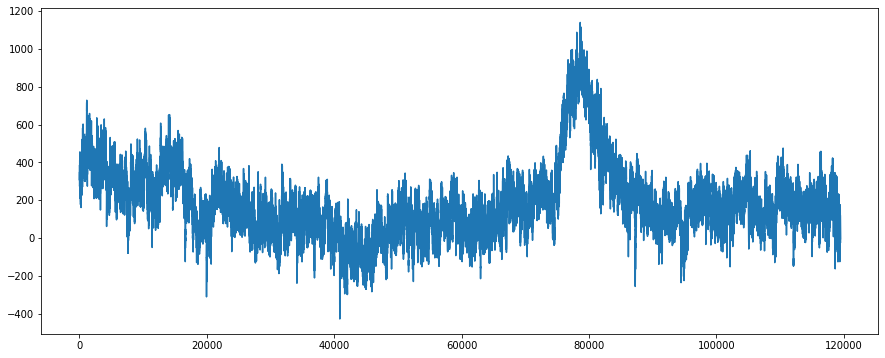

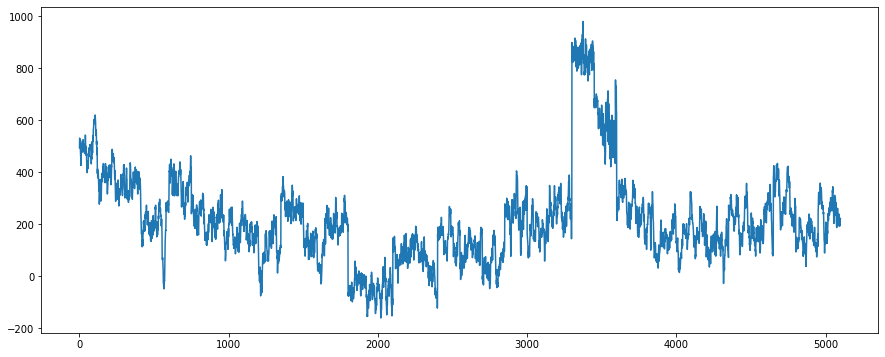

In [ ]:
Pz_bsl = []
for i in range(119495):
  if BSL[i] == 1:
    Pz_bsl.append(Pz[i])
 
print(Pz_bsl)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz_bsl)

<Figure size 1440x432 with 0 Axes>

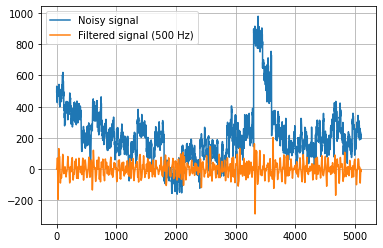

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Pz_bsl, label='Noisy signal')

y6 = butter_bandpass_filter(Pz_bsl, lowcut, highcut, fs, order=6)

plt.plot( y6, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y6))

5100


In [ ]:
y6 = np.array(y6)
import statistics

median = np.median(y6)
mean = y6.mean()
var = statistics.variance(y6)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y6)
peak2peak = max(y6)-min(y6)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  2086.274219838159
median =  0.532672296580289
mean =  -0.05850884408307712
Standard Deviation =  45.67575089517587
kurtosis =  1.4764351049682576
skewness =  -0.1628970882832066
Peak to peak =  489.34082015175693


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y6)

-0.05850884408307712

In [ ]:
#2.median
median = np.median(y6)
median

0.532672296580289

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y6)


2086.274219838159

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y6)

45.67575089517587

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y6)

4.780262062669155

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y6)

-0.1628970882832066

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y6)

489.34082015175693

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y6)

45.6713101382756

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y6)

(array([2.15412046e+00, 1.55521277e+00, 2.23644910e+00, 8.10865884e+01,
        2.38882463e+02, 1.37056337e+02, 7.30139868e+01, 6.07273155e+01,
        7.02604616e+01, 4.93494158e+01, 2.88713132e+01, 3.78239807e+01,
        2.78296756e+01, 1.78993095e+01, 1.86189672e+01, 1.75509828e+01,
        6.73218246e+00, 2.47130362e+00, 7.29462337e-01, 3.09490658e-01,
        1.28336734e-01, 5.41120833e-02, 3.54549936e-02, 1.93992906e-02,
        1.05145964e-02, 1.27078889e-02, 9.38083277e-03, 8.19533038e-03,
        6.73288846e-03, 6.90507337e-03, 6.22768903e-03, 5.46551587e-03,
        4.88056029e-03, 4.66959320e-03, 4.43317711e-03, 4.07437197e-03,
        3.83790203e-03, 3.59233844e-03, 3.46837543e-03, 3.29366794e-03,
        3.07052536e-03, 2.95133277e-03, 2.80044822e-03, 2.65100801e-03,
        2.54801137e-03, 2.44718839e-03, 2.33078870e-03, 2.23876577e-03,
        2.15320753e-03, 2.06633007e-03, 1.99201001e-03, 1.91636432e-03,
        1.85015013e-03, 1.78630429e-03, 1.72514956e-03, 1.669521

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y6, sf=500, method='welch', normalize=True))

0.48788543474903356


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y6))

0.5797775288546196


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y6))

zs = numpy.where(numpy.diff(numpy.sign(y6)))[0]
zs

267


array([  16,   30,   55,   89,  113,  134,  144,  175,  207,  228,  234,
        243,  268,  300,  329,  341,  348,  365,  381,  383,  393,  404,
        412,  428,  443,  467,  494,  526,  547,  568,  587,  606,  644,
        670,  689,  691,  709,  741,  779,  808,  842,  853,  862,  891,
        914,  926,  929,  953,  997, 1026, 1055, 1081, 1107, 1113, 1125,
       1152, 1161, 1172, 1192, 1217, 1231, 1255, 1286, 1313, 1351, 1379,
       1405, 1434, 1468, 1498, 1509, 1516, 1533, 1552, 1565, 1571, 1580,
       1587, 1596, 1609, 1624, 1654, 1693, 1726, 1737, 1740, 1757, 1784,
       1792, 1798, 1811, 1816, 1828, 1852, 1885, 1918, 1954, 1980, 2009,
       2027, 2046, 2069, 2084, 2107, 2119, 2131, 2155, 2181, 2220, 2249,
       2269, 2283, 2298, 2316, 2327, 2334, 2348, 2352, 2362, 2380, 2388,
       2397, 2416, 2432, 2465, 2501, 2526, 2564, 2583, 2610, 2626, 2632,
       2655, 2674, 2705, 2717, 2730, 2758, 2775, 2800, 2820, 2843, 2868,
       2885, 2896, 2902, 2912, 2926, 2947, 2955, 29